In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
from datetime import timezone, timedelta

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [6]:
df = pd.read_excel('horse.xlsx')
df.head(3)

,Dato,Track,Race Number,Distance,Surface,Prize money,Starting position,Jockey,Jockey weight,Country,...,TrainerName,Race time,Path,Final place,FGrating,Odds,RaceType,HorseId,JockeyId,TrainerID
0,2017-09-03,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,CH Yip,"83,38",2,9,110,22.0,Handicap,1736,8656,6687
1,2017-09-16,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,CH Yip,"81,56",3,4,124,48.0,Handicap,1736,8659,6687
2,2017-10-14,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,CH Yip,"82,36",1,6,118,11.0,Handicap,1736,8659,6687


In [7]:
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df.head(3)

,dato,track,race_number,distance,surface,prize_money,starting_position,jockey,jockey_weight,country,...,trainername,race_time,path,final_place,fgrating,odds,racetype,horseid,jockeyid,trainerid
0,2017-09-03,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,CH Yip,"83,38",2,9,110,22.0,Handicap,1736,8656,6687
1,2017-09-16,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,CH Yip,"81,56",3,4,124,48.0,Handicap,1736,8659,6687
2,2017-10-14,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,CH Yip,"82,36",1,6,118,11.0,Handicap,1736,8659,6687


In [8]:
df = df.rename(columns={'dato': 'date'})

In [9]:
df.shape

(27008, 21)


This dataset presents all the characteristics of the horses that raced in Honk Kong, between 2017 and 2020. The data was taken from the Hong Kong Jockey Club website.

**date:** Date of the race. In Hong Kong there is only one race day, per day (racing two days a week). Bear in mind that the racing season starts in September and ends in July.

**track:** The track the race was ran on, in Hong Kong that is either Sha Tin or Happy Valley. This is of importance, as horses often like Happy Valley or Sha Tin better than the other. Sha Tin is the main track.

**race_number:** The race number (a race day consists of 8-11 races).

**distance:** The distance the particular race was ran at, in meters. Some horses are experts at sprint distances (e.g 1200 meters), some at middle distance (e.g 1600 meters), and some at longer distances (e.g 2000 m). Trainers could have specialities, too.

**surface:** If the race was ran at Turf track (grass), or dirt track (AW - All Weather), which is a sand-based surface. This has predictive power - some horses prefer turf racing; some horses prefer dirt racing. Trainers could have specialities here, too.

**prize_money:** This is the total amount of prize money in the race. The higher the prize money, the better the race.

**starting_position:** The start gate number/post position, high numbers are drawn "wide" while low numbers are drawn to the inside. This is important, as high start gate numbers will correlate with ground loss (a lot of "paths"), because there is an increased chance of getting a position outside of other horses in the turns. The exception is the distance 1000 metres at Sha Tin, at this distance there are no turns and high numbers are usually not a bad thing.

**jockey:** Who rode the horse in the race. Some jockeys win a lot more races than others.

**jockey_weight:** The weight of the jockey How much a jockey should (minimum) weigh in a given race is not a coincidence, it's based upon rules. Low weight (e.g 50 kg) represents racing against better horses with some weight advantages, while a high weight (e.g 60 kg) represents facing slower horses, but at a penalty.

**country:** Where the horse was born.

**age:** The age of the horse at the time of the race. A horse peaks at about 4 to 5 years old in average. Younger horses could improve more, older horses might get slower with age.

**trainer_name:** The name of the trainer. A trainer is obviously important. How good they are could be calculated with a winning-% (wins/starts*100), but one could also calculate ROI based upon odds. There could also be hidden patterns based on age, distance, surface, the form of stable mates in the time period, etc.

**race_time:** The time of the race for the particular horse, in seconds.

**path:** Is a measure of how wide each horse has been in the turn(s). A higher number means more ground loss due to wide position in the turns, i.e they have not ran the shortest way possible.

**final_place:** The finishing position in a race. (i.e 1st, 3rd, 4th etc)

**fgrating:** It's a way to normalize race times, so that it measures the quickness of the race regardless of which track, which distance, or the conditions at the race day. A way to normalize how fast a horse ran.

**odds:** The odds the horse went off at in the market, i.e the probability of victory. This is important, as obviously lower odds correspond with a better finishing position in general.

**race_type:** Mostly a distinguishing between "handicap races", where the horses do not carry the same jockey weight, and "non-handicap" - where the horses carry the same jockey weight and the fastest horse most often wins.

**horseid:** Just an ID of the horse.

**jockeyid:** Just an ID of the jockey.

**trainerid:** Just an ID of the trainer.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27008 entries, 0 to 27007
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               27008 non-null  datetime64[ns]
 1   track              27008 non-null  object        
 2   race_number        27008 non-null  int64         
 3   distance           27008 non-null  int64         
 4   surface            27008 non-null  object        
 5   prize_money        27008 non-null  int64         
 6   starting_position  27008 non-null  int64         
 7   jockey             27008 non-null  object        
 8   jockey_weight      27008 non-null  int64         
 9   country            27008 non-null  object        
 10  horse_age          27008 non-null  int64         
 11  trainername        27008 non-null  object        
 12  race_time          27008 non-null  object        
 13  path               27008 non-null  int64         
 14  final_

In [11]:
df.isna().sum(axis=0)

date                 0
track                0
race_number          0
distance             0
surface              0
prize_money          0
starting_position    0
jockey               0
jockey_weight        0
country              0
horse_age            0
trainername          0
race_time            0
path                 0
final_place          0
fgrating             0
odds                 0
racetype             0
horseid              0
jockeyid             0
trainerid            0
dtype: int64

In [12]:
df.nunique()

date                  240
track                   2
race_number            11
distance                9
surface                 2
prize_money            39
starting_position      14
jockey                 89
jockey_weight          16
country                17
horse_age              10
trainername            86
race_time            3925
path                   12
final_place            14
fgrating              141
odds                  530
racetype                4
horseid              2297
jockeyid               89
trainerid              86
dtype: int64

**Провести анализ лошадиных скачек, проводимых в Гонконге с 2017 по 2020гг.**
Для этого:

- посчитать кол-во забегов, размер/динамику призового фонда
- изучить данные о жокеях и лошадях
- посмотреть, есть ли взаимосвязь между различными параметрами и финальными местами  
- определить лучших лошадей, жокеев, тренеров; ввести KPI «коэффициент успеха»
- сегментировать лошадей
- посмотреть интересные факты: как менялись результаты лошадей с возрастом; есть ли лошади, от которых никто не ожидал победы


In [13]:
df['race_time'] = df['race_time'].str.replace(',', '.')

In [14]:
df['race_time'] = df['race_time'].astype(float)

In [15]:
df['speed_km_h'] = round(df['distance']/df['race_time']/1000*3600, 2) #добавим столбец со скоростью

In [16]:
df.head(3)

,date,track,race_number,distance,surface,prize_money,starting_position,jockey,jockey_weight,country,...,race_time,path,final_place,fgrating,odds,racetype,horseid,jockeyid,trainerid,speed_km_h
0,2017-09-03,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,83.38,2,9,110,22.0,Handicap,1736,8656,6687,60.45
1,2017-09-16,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,81.56,3,4,124,48.0,Handicap,1736,8659,6687,61.79
2,2017-10-14,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,82.36,1,6,118,11.0,Handicap,1736,8659,6687,61.19


**<span style="color:orangered">Построим кореляционную матрицу</span>**

In [17]:
df_corr_final_place = df[['final_place', 'starting_position', 'jockey_weight', 'horse_age']] #влияние на финальное место
df_corr_speed_km_h = df[['speed_km_h', 'starting_position', 'jockey_weight', 'horse_age']] #влияние на скорость

In [18]:
df_dummy = pd.get_dummies(data=df['country'], drop_first = True) # создаёт фиктивные переменные
df_dummy = df_dummy.replace([True], int(1))
df_dummy = df_dummy.replace([False], int(0))
df_dummy.head(2)

,Australia,Brasil,Chile,Danmark,Frankrike,Great Britain,Irland,Italia,Japan,New Zealand,S?r-Afrika,Spania,Sverige,Tyskland,USA,Uten Land
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
df_corr_final_place_dummy = pd.concat([df_corr_final_place, df_dummy], axis=1) # объединить данные dummy с учётом страны рождения лошади
df_corr_speed_km_h_dummy = pd.concat([df_corr_speed_km_h, df_dummy], axis=1)

In [20]:
corr = df_corr_final_place_dummy.corr()
corr.style.background_gradient(cmap='Oranges')

,final_place,starting_position,jockey_weight,horse_age,Australia,Brasil,Chile,Danmark,Frankrike,Great Britain,Irland,Italia,Japan,New Zealand,S?r-Afrika,Spania,Sverige,Tyskland,USA,Uten Land
final_place,1.000000,0.134356,-0.074570,-0.031507,-0.021055,0.017874,0.008824,-0.001139,0.014687,0.015670,0.013599,0.000889,0.008583,-0.019672,0.030467,-0.002130,-0.009539,0.016210,0.017934,-0.000436
starting_position,0.134356,1.000000,0.002935,-0.016219,0.002638,0.001418,-0.001222,-0.002871,0.006319,-0.013542,0.003142,0.005817,-0.009011,-0.002367,0.008031,-0.001015,0.002994,-0.006321,0.008777,0.000603
jockey_weight,-0.074570,0.002935,1.000000,-0.057940,-0.011613,0.001148,0.009188,-0.001928,0.019460,0.001640,0.037807,0.012114,0.002779,-0.028016,0.013219,-0.005275,-0.010960,-0.000248,0.004410,0.005133
horse_age,-0.031507,-0.016219,-0.057940,1.000000,-0.018930,-0.008837,-0.004990,-0.000987,-0.021721,-0.016565,-0.060427,0.011246,-0.034932,0.104850,-0.012703,0.003425,0.043477,-0.043472,-0.014813,-0.007057
Australia,-0.021055,0.002638,-0.011613,-0.018930,1.000000,-0.053209,-0.005940,-0.005940,-0.156177,-0.262413,-0.356565,-0.038983,-0.060402,-0.567013,-0.105365,-0.035665,-0.025902,-0.095872,-0.128786,-0.008401
Brasil,0.017874,0.001418,0.001148,-0.008837,-0.053209,1.000000,-0.000332,-0.000332,-0.008720,-0.014651,-0.019908,-0.002177,-0.003372,-0.031658,-0.005883,-0.001991,-0.001446,-0.005353,-0.007191,-0.000469
Chile,0.008824,-0.001222,0.009188,-0.004990,-0.005940,-0.000332,1.000000,-0.000037,-0.000973,-0.001636,-0.002223,-0.000243,-0.000376,-0.003534,-0.000657,-0.000222,-0.000161,-0.000598,-0.000803,-0.000052
Danmark,-0.001139,-0.002871,-0.001928,-0.000987,-0.005940,-0.000332,-0.000037,1.000000,-0.000973,-0.001636,-0.002223,-0.000243,-0.000376,-0.003534,-0.000657,-0.000222,-0.000161,-0.000598,-0.000803,-0.000052
Frankrike,0.014687,0.006319,0.019460,-0.021721,-0.156177,-0.008720,-0.000973,-0.000973,1.000000,-0.043004,-0.058434,-0.006389,-0.009899,-0.092922,-0.017267,-0.005845,-0.004245,-0.015712,-0.021105,-0.001377
Great Britain,0.015670,-0.013542,0.001640,-0.016565,-0.262413,-0.014651,-0.001636,-0.001636,-0.043004,1.000000,-0.098182,-0.010734,-0.016632,-0.156130,-0.029013,-0.009820,-0.007132,-0.026399,-0.035462,-0.002313


In [21]:
corr = df_corr_speed_km_h_dummy.corr()
corr.style.background_gradient(cmap='Oranges')

,speed_km_h,starting_position,jockey_weight,horse_age,Australia,Brasil,Chile,Danmark,Frankrike,Great Britain,Irland,Italia,Japan,New Zealand,S?r-Afrika,Spania,Sverige,Tyskland,USA,Uten Land
speed_km_h,1.000000,-0.015737,-0.007139,-0.138405,0.192448,-0.025015,-0.009701,-0.006357,-0.088978,-0.046619,-0.097860,0.018966,-0.021257,-0.058700,-0.003248,-0.037284,-0.016139,-0.050616,-0.032475,0.004659
starting_position,-0.015737,1.000000,0.002935,-0.016219,0.002638,0.001418,-0.001222,-0.002871,0.006319,-0.013542,0.003142,0.005817,-0.009011,-0.002367,0.008031,-0.001015,0.002994,-0.006321,0.008777,0.000603
jockey_weight,-0.007139,0.002935,1.000000,-0.057940,-0.011613,0.001148,0.009188,-0.001928,0.019460,0.001640,0.037807,0.012114,0.002779,-0.028016,0.013219,-0.005275,-0.010960,-0.000248,0.004410,0.005133
horse_age,-0.138405,-0.016219,-0.057940,1.000000,-0.018930,-0.008837,-0.004990,-0.000987,-0.021721,-0.016565,-0.060427,0.011246,-0.034932,0.104850,-0.012703,0.003425,0.043477,-0.043472,-0.014813,-0.007057
Australia,0.192448,0.002638,-0.011613,-0.018930,1.000000,-0.053209,-0.005940,-0.005940,-0.156177,-0.262413,-0.356565,-0.038983,-0.060402,-0.567013,-0.105365,-0.035665,-0.025902,-0.095872,-0.128786,-0.008401
Brasil,-0.025015,0.001418,0.001148,-0.008837,-0.053209,1.000000,-0.000332,-0.000332,-0.008720,-0.014651,-0.019908,-0.002177,-0.003372,-0.031658,-0.005883,-0.001991,-0.001446,-0.005353,-0.007191,-0.000469
Chile,-0.009701,-0.001222,0.009188,-0.004990,-0.005940,-0.000332,1.000000,-0.000037,-0.000973,-0.001636,-0.002223,-0.000243,-0.000376,-0.003534,-0.000657,-0.000222,-0.000161,-0.000598,-0.000803,-0.000052
Danmark,-0.006357,-0.002871,-0.001928,-0.000987,-0.005940,-0.000332,-0.000037,1.000000,-0.000973,-0.001636,-0.002223,-0.000243,-0.000376,-0.003534,-0.000657,-0.000222,-0.000161,-0.000598,-0.000803,-0.000052
Frankrike,-0.088978,0.006319,0.019460,-0.021721,-0.156177,-0.008720,-0.000973,-0.000973,1.000000,-0.043004,-0.058434,-0.006389,-0.009899,-0.092922,-0.017267,-0.005845,-0.004245,-0.015712,-0.021105,-0.001377
Great Britain,-0.046619,-0.013542,0.001640,-0.016565,-0.262413,-0.014651,-0.001636,-0.001636,-0.043004,1.000000,-0.098182,-0.010734,-0.016632,-0.156130,-0.029013,-0.009820,-0.007132,-0.026399,-0.035462,-0.002313


In [22]:
corr = df_corr_final_place.corr() # без учёта страны рождения
corr.style.background_gradient(cmap='Blues')

,final_place,starting_position,jockey_weight,horse_age
final_place,1.000000,0.134356,-0.074570,-0.031507
starting_position,0.134356,1.000000,0.002935,-0.016219
jockey_weight,-0.074570,0.002935,1.000000,-0.057940
horse_age,-0.031507,-0.016219,-0.057940,1.000000


In [23]:
corr = df_corr_speed_km_h.corr()
corr.style.background_gradient(cmap='Blues')

,speed_km_h,starting_position,jockey_weight,horse_age
speed_km_h,1.000000,-0.015737,-0.007139,-0.138405
starting_position,-0.015737,1.000000,0.002935,-0.016219
jockey_weight,-0.007139,0.002935,1.000000,-0.057940
horse_age,-0.138405,-0.016219,-0.057940,1.000000


In [24]:
df_1 = df.query("racetype == 'Non-handicap'") # по отдельному типу забегов
df_corr_final_place_1 = df_1[['final_place', 'starting_position', 'jockey_weight', 'horse_age']]

In [25]:
corr = df_corr_final_place_1.corr()
corr.style.background_gradient(cmap='Blues')

,final_place,starting_position,jockey_weight,horse_age
final_place,1.000000,0.150409,0.019600,-0.104646
starting_position,0.150409,1.000000,-0.078617,-0.194882
jockey_weight,0.019600,-0.078617,1.000000,0.147724
horse_age,-0.104646,-0.194882,0.147724,1.000000


In [26]:
df_2 = df.query("track == 'Happy Valley'") # в разрезе ипподромов
df_corr_final_place_2 = df_2[['final_place', 'starting_position', 'jockey_weight', 'horse_age']]

In [27]:
corr = df_corr_final_place_2.corr()
corr.style.background_gradient(cmap='Blues')

,final_place,starting_position,jockey_weight,horse_age
final_place,1.000000,0.152605,-0.072635,-0.008100
starting_position,0.152605,1.000000,0.002651,0.011960
jockey_weight,-0.072635,0.002651,1.000000,-0.031657
horse_age,-0.008100,0.011960,-0.031657,1.000000


In [28]:
df_horse = pd.DataFrame(df.horseid.value_counts()) # возьмём только лошадей, которые принимали участие в забеге более 30 раз
df_horse_id = df_horse.query("count > 30")
df_horse_often = pd.merge(df, df_horse_id, on='horseid', how = 'inner')

In [29]:
df_corr_final_place_30 = df_horse_often[['final_place', 'starting_position', 'jockey_weight', 'horse_age']]
df_corr_speed_km_h_30 = df_horse_often[['speed_km_h', 'starting_position', 'jockey_weight', 'horse_age']]

In [30]:
corr = df_corr_final_place_30.corr()
corr.style.background_gradient(cmap='Blues')

,final_place,starting_position,jockey_weight,horse_age
final_place,1.000000,0.164764,-0.079104,0.069367
starting_position,0.164764,1.000000,-0.010423,0.039242
jockey_weight,-0.079104,-0.010423,1.000000,-0.100791
horse_age,0.069367,0.039242,-0.100791,1.000000


In [31]:
corr = df_corr_speed_km_h_30.corr()
corr.style.background_gradient(cmap='Blues')

,speed_km_h,starting_position,jockey_weight,horse_age
speed_km_h,1.000000,-0.012577,-0.051629,-0.084674
starting_position,-0.012577,1.000000,-0.010423,0.039242
jockey_weight,-0.051629,-0.010423,1.000000,-0.100791
horse_age,-0.084674,0.039242,-0.100791,1.000000


In [32]:
df_corr_speed_place = df_horse_often[['speed_km_h', 'final_place', 'jockey_weight', 'horse_age']]

In [33]:
corr = df_corr_speed_place.corr()
corr.style.background_gradient(cmap='Blues')

,speed_km_h,final_place,jockey_weight,horse_age
speed_km_h,1.000000,-0.190173,-0.051629,-0.084674
final_place,-0.190173,1.000000,-0.079104,0.069367
jockey_weight,-0.051629,-0.079104,1.000000,-0.100791
horse_age,-0.084674,0.069367,-0.100791,1.000000


**ВЫВОДЫ:** По данным корреляционных матриц к-нты корреляции незначительные. Рассматривалась зависимость финального места/скорости от таких факторов, как возраст лошади, страна рождения, вес жокея, начальной позиции и т. д.

**<span style="color:orangered">Добавим столбец "Сезон"</span>**

In [34]:
df['max_date'] = df['date'].max() # сезон начинается в сентябре и заканчивается не позже июля


In [35]:
df['days_'] = (df['max_date'] - df['date']).dt.days
df.head(3)

,date,track,race_number,distance,surface,prize_money,starting_position,jockey,jockey_weight,country,...,final_place,fgrating,odds,racetype,horseid,jockeyid,trainerid,speed_km_h,max_date,days_
0,2017-09-03,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,9,110,22.0,Handicap,1736,8656,6687,60.45,2020-06-21,1022
1,2017-09-16,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,4,124,48.0,Handicap,1736,8659,6687,61.79,2020-06-21,1009
2,2017-10-14,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,6,118,11.0,Handicap,1736,8659,6687,61.19,2020-06-21,981


In [36]:
df['season'] = df['days_'].apply(lambda x: 'season_2019' if x < 323  else 'season_2018' if 323 < x < 688 else 'season_2017')
df.head(3)

,date,track,race_number,distance,surface,prize_money,starting_position,jockey,jockey_weight,country,...,fgrating,odds,racetype,horseid,jockeyid,trainerid,speed_km_h,max_date,days_,season
0,2017-09-03,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,110,22.0,Handicap,1736,8656,6687,60.45,2020-06-21,1022,season_2017
1,2017-09-16,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,124,48.0,Handicap,1736,8659,6687,61.79,2020-06-21,1009,season_2017
2,2017-10-14,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,118,11.0,Handicap,1736,8659,6687,61.19,2020-06-21,981,season_2017


In [37]:
df["year"] = pd.to_datetime(df["date"]).dt.year
df["month"] = pd.to_datetime(df["date"]).dt.month
df["week_day"]=df["date"].dt.day_name()
df.head(3)

,date,track,race_number,distance,surface,prize_money,starting_position,jockey,jockey_weight,country,...,horseid,jockeyid,trainerid,speed_km_h,max_date,days_,season,year,month,week_day
0,2017-09-03,Sha Tin,10,1400,Gress,1310000,6,K C Leung,52,Sverige,...,1736,8656,6687,60.45,2020-06-21,1022,season_2017,2017,9,Sunday
1,2017-09-16,Sha Tin,10,1400,Gress,1310000,14,C Y Ho,52,Sverige,...,1736,8659,6687,61.79,2020-06-21,1009,season_2017,2017,9,Saturday
2,2017-10-14,Sha Tin,10,1400,Gress,1310000,8,C Y Ho,52,Sverige,...,1736,8659,6687,61.19,2020-06-21,981,season_2017,2017,10,Saturday


**<span style="color:orangered">Посчитаем кол-во забегов "Сезон"</span>**

In [38]:
df_race_count = df.groupby(['track', 'season', 'date']).aggregate({'race_number': 'max'}).reset_index() # будем считать, что на каждом ипподроме кол-во забегов в календарный день равно максимальному порядковому номеру забега
df_race_count.head()

,track,season,date,race_number
0,Happy Valley,season_2017,2017-09-06,8
1,Happy Valley,season_2017,2017-09-13,8
2,Happy Valley,season_2017,2017-09-20,8
3,Happy Valley,season_2017,2017-09-27,8
4,Happy Valley,season_2017,2017-10-05,8


In [39]:
df_race_count = df_race_count.rename(columns={'race_number': 'race_amount'}) #добавим месяц, день недели, чтобы посмотреть по каким дням скачки
df_race_count["year"] = pd.to_datetime(df_race_count['date']).dt.year
df_race_count["month"] = pd.to_datetime(df_race_count['date']).dt.month
df_race_count["week_day"]=df_race_count['date'].dt.day_name()

In [40]:
df_race_count.groupby(['track', 'season', 'week_day']).aggregate({'race_amount': 'sum'})

race_amount
track        season      week_day              
Happy Valley season_2017 Sunday              10
                         Thursday             8
                         Wednesday          242
             season_2018 Sunday              10
                         Thursday             8
                         Wednesday          283
             season_2019 Thursday             9
                         Wednesday          278
Sha Tin      season_2017 Monday              21
                         Saturday            90
                         Sunday             253
                         Wednesday           32
             season_2018 Monday              30
                         Saturday           100
                         Sunday             318
                         Thursday            11
                         Tuesday             11
                         Wednesday           40
             season_2019 Monday              11
                         Saturday            90
                         Sunday             326
                         Tuesday             10
                         Wednesday           35

In [41]:
df_a = df_race_count.pivot_table(index='season',       
               columns='track',
               aggfunc={'race_amount': 'sum'},)
df_a

race_amount        
track       Happy Valley Sha Tin
season                          
season_2017          260     396
season_2018          301     510
season_2019          287     472

In [42]:
df_1 = pd.crosstab(df_race_count.season, # общее кол-во скачек в разрезе сезонов и ипподромов
            df_race_count.track,
            values=df_race_count.race_amount,
            aggfunc='sum', margins=True,
            margins_name="Total")
df_1

track,Happy Valley,Sha Tin,Total
season,,,
season_2017,260,396,656
season_2018,301,510,811
season_2019,287,472,759
Total,848,1378,2226


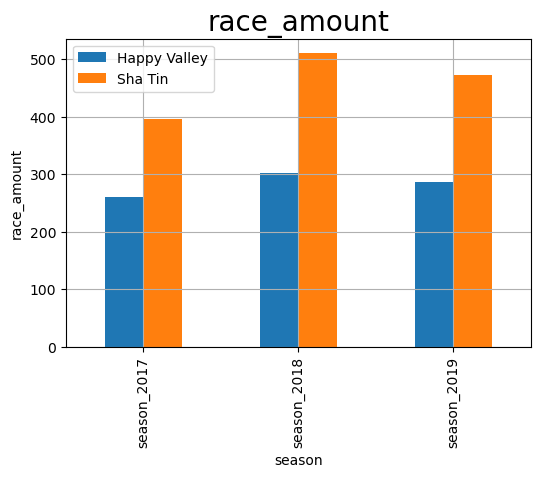

In [43]:
df_a.plot(kind = 'bar', ylabel = 'race_amount', figsize=(6, 4))
plt.title('race_amount', fontsize = 20)
plt.legend(loc='upper left')
plt.legend(['Happy Valley', 'Sha Tin'])
plt.grid(True)

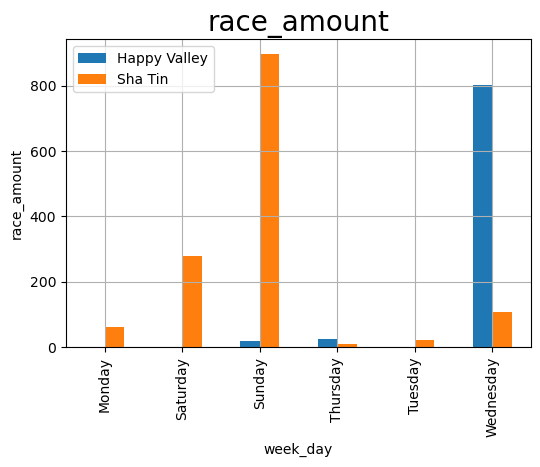

In [44]:
df_b = pd.crosstab(df_race_count.week_day,
            df_race_count.track,
            values=df_race_count.race_amount,
            aggfunc='sum', margins=False)
df_b
df_b.plot(kind = 'bar', ylabel = 'race_amount', xlabel = 'week_day', figsize=(6, 4))
plt.title('race_amount', fontsize = 20)
plt.legend(loc='upper left')
plt.legend(['Happy Valley', 'Sha Tin'])
plt.grid(True)

In [45]:
df_b

track,Happy Valley,Sha Tin
week_day,,
Monday,NaN,62.0
Saturday,NaN,280.0
Sunday,20.0,897.0
Thursday,25.0,11.0
Tuesday,NaN,21.0
Wednesday,803.0,107.0


In [46]:
df_race_count_1 = df_race_count.query('track =="Happy Valley"')
df_race_count_2 = df_race_count.query('track =="Sha Tin"')

In [47]:
df_с = pd.crosstab(df_race_count_1.month,
            df_race_count_1.season,
            values=df_race_count_1.race_amount,
            aggfunc='sum', margins=False)
df_с

season,season_2017,season_2018,season_2019
month,,,
1,24.0,32.0,36.0
2,25.0,25.0,25.0
3,32.0,32.0,32.0
4,24.0,24.0,35.0
5,16.0,32.0,27.0
6,NaN,16.0,18.0
7,NaN,17.0,NaN
9,32.0,24.0,17.0
10,42.0,42.0,34.0


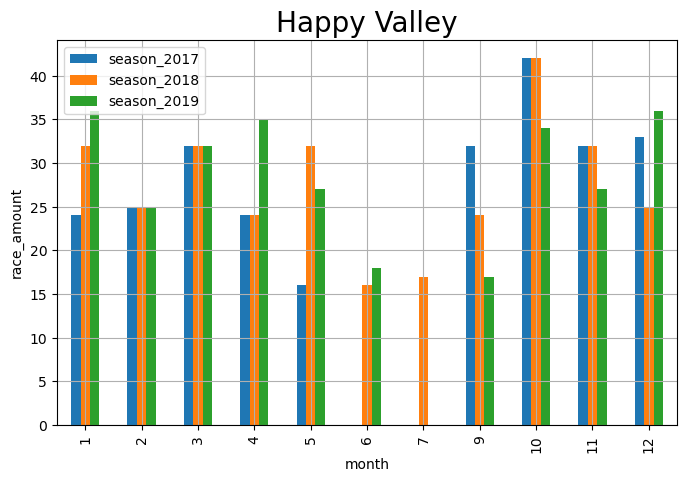

In [48]:
df_с.plot(kind = 'bar', ylabel = 'race_amount', xlabel = 'month', figsize=(8, 5))
plt.title('Happy Valley', fontsize = 20)
plt.legend(['season_2017', 'season_2018', 'season_2019'])
plt.legend(loc='upper left')
plt.grid(True)

In [49]:
df_d = pd.crosstab(df_race_count_2.month,
            df_race_count_2.season,
            values=df_race_count_2.race_amount,
            aggfunc='sum', margins=False)
df_d

season,season_2017,season_2018,season_2019
month,,,
1,59.0,51.0,51.0
2,50.0,51.0,48.0
3,40.0,50.0,51.0
4,51.0,49.0,49.0
5,28.0,50.0,62.0
6,NaN,50.0,32.0
7,NaN,32.0,NaN
9,40.0,30.0,40.0
10,40.0,48.0,49.0


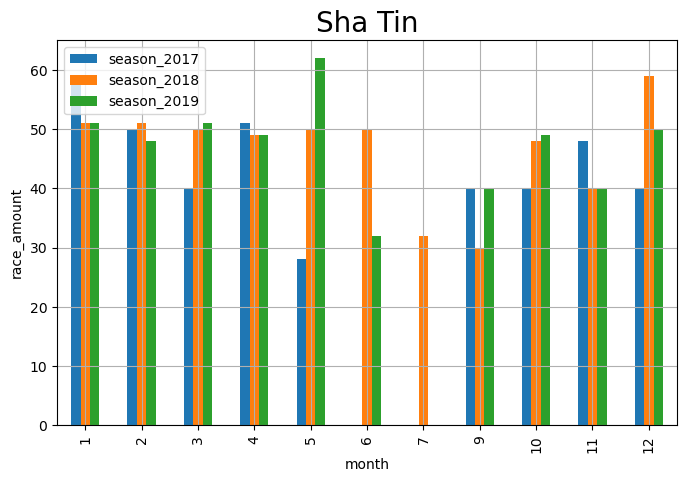

In [50]:
df_d.plot(kind = 'bar', ylabel = 'race_amount', xlabel = 'month', figsize=(8, 5))
plt.title('Sha Tin', fontsize = 20)
plt.legend(['season_2017', 'season_2018', 'season_2019'])
plt.legend(loc='upper left')
plt.grid(True)

**ВЫВОДЫ:** 

Всего за три сезона было проведено 2226 забегов. Больше всего забегов состоялось в Сезоне 2018. Также Сезон 2018 был самым продолжительным, скачки состоялись на протяжении июня и в июле, хотя традиционно сезон завершается в мае. Самые популярные месяцы для проведения скачек с октября по апрель.

Чаще скачки устраивают на ипподроме Sha Tin иногда до шести дней в неделю. На ипподроме Happy Valley скачки проводят три дня в неделю, а в Сезоне 2019 только по средам и четвергам



На ипподроме Sha Tin самый популярный день воскресенье (было организовано 897 забегов из 1378 суммарно за три сезона). На Happy Valley по средам состоялось 803 забега из 848.


**<span style="color:orangered">Посмотрим размер/динамику призового фонда</span>**

In [51]:
df_prize_money = df.groupby(['track', 'season', 'date','race_number']).aggregate({'prize_money': 'mean', 'distance': 'mean'}).reset_index()
df_prize_money["year"] = pd.to_datetime(df_prize_money['date']).dt.year
df_prize_money["month"] = pd.to_datetime(df_prize_money['date']).dt.month
df_prize_money["week_day"]=df_prize_money['date'].dt.day_name()
df_prize_money['prize_money'] = round(df_prize_money['prize_money']/1000, 0) # для удобства будем брать в тыс. гонконских долларах
df_prize_money = df_prize_money.rename(columns={'prize_money': 'prize_money_thousands'})
df_prize_money

,track,season,date,race_number,prize_money_thousands,distance,year,month,week_day
0,Happy Valley,season_2017,2017-09-06,1,660.0,1200.0,2017,9,Wednesday
1,Happy Valley,season_2017,2017-09-06,2,880.0,1650.0,2017,9,Wednesday
2,Happy Valley,season_2017,2017-09-06,3,660.0,1650.0,2017,9,Wednesday
3,Happy Valley,season_2017,2017-09-06,4,880.0,1000.0,2017,9,Wednesday
4,Happy Valley,season_2017,2017-09-06,5,880.0,1200.0,2017,9,Wednesday
...,...,...,...,...,...,...,...,...,...
2219,Sha Tin,season_2019,2020-06-21,7,967.0,1600.0,2020,6,Sunday
2220,Sha Tin,season_2019,2020-06-21,8,3250.0,1800.0,2020,6,Sunday
2221,Sha Tin,season_2019,2020-06-21,9,1450.0,1400.0,2020,6,Sunday
2222,Sha Tin,season_2019,2020-06-21,10,1450.0,1400.0,2020,6,Sunday


In [52]:
df_2 = pd.crosstab(df_prize_money.season,
            df_prize_money.track,
            values=df_prize_money.prize_money_thousands,
            aggfunc='sum', margins=True,
            margins_name="Total")
df_2

track,Happy Valley,Sha Tin,Total
season,,,
season_2017,285300.0,701130.0,986430.0
season_2018,343623.0,874700.0,1218323.0
season_2019,345524.0,866791.0,1212315.0
Total,974447.0,2442621.0,3417068.0


In [53]:
df_e = pd.crosstab(df_prize_money.season,
            df_prize_money.track,
            values=df_prize_money.prize_money_thousands,
            aggfunc='sum', margins=False)
df_e

track,Happy Valley,Sha Tin
season,,
season_2017,285300.0,701130.0
season_2018,343623.0,874700.0
season_2019,345524.0,866791.0


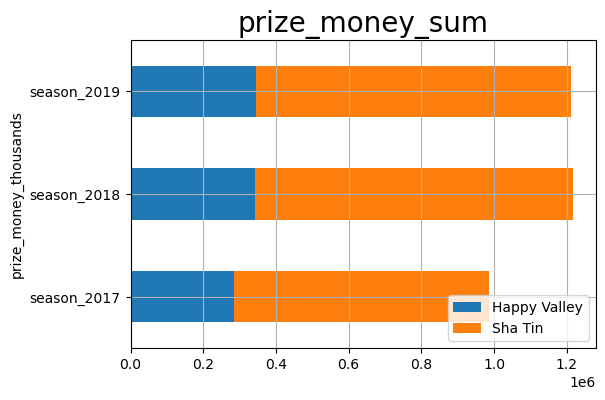

In [54]:
df_e.plot(kind = 'barh', ylabel = 'prize_money_thousands', stacked=True, figsize=(6, 4))
plt.title('prize_money_sum', fontsize = 20)
plt.legend(['Happy Valley', 'Sha Tin'])
plt.legend(loc='lower right')
plt.grid(True)

In [55]:
df_f = pd.crosstab(df_prize_money.week_day,
            df_prize_money.track,
            values=df_prize_money.prize_money_thousands,
            aggfunc='mean', margins=False)
df_f

track,Happy Valley,Sha Tin
week_day,,
Monday,NaN,1449.241935
Saturday,NaN,1216.614286
Sunday,1201.000000,2059.053571
Thursday,1145.720000,1200.454545
Tuesday,NaN,1519.428571
Wednesday,1149.356608,1141.037383


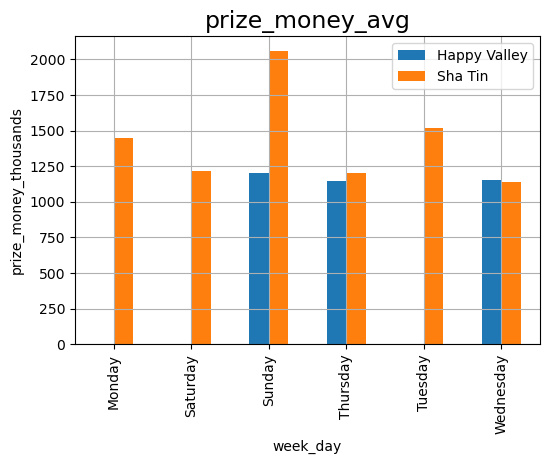

In [56]:
df_f.plot(kind = 'bar', ylabel = 'prize_money_thousands', xlabel = 'week_day', title = 'prize_money_avg', figsize=(6, 4))
plt.title('prize_money_avg', fontsize = 17)
plt.legend(loc='upper left')
plt.legend(['Happy Valley', 'Sha Tin'])
plt.grid(True)

In [57]:
df_prize_money.distance.value_counts()

distance
1200.0    812
1650.0    377
1400.0    360
1000.0    232
1800.0    182
1600.0    167
2000.0     54
2200.0     32
2400.0      8
Name: count, dtype: int64

In [58]:
df_g = pd.crosstab(df_prize_money.distance,
            df_prize_money.track,
            values=df_prize_money.prize_money_thousands,
            aggfunc='mean', margins=False)
df_g

track,Happy Valley,Sha Tin
distance,,
1000.0,1128.140187,1279.856000
1200.0,1150.669492,1533.515284
1400.0,NaN,1358.486111
1600.0,NaN,2509.113772
1650.0,1137.811388,1176.635417
1800.0,1269.935897,1574.355769
2000.0,NaN,5606.981481
2200.0,1022.925926,1049.000000
2400.0,NaN,10937.500000


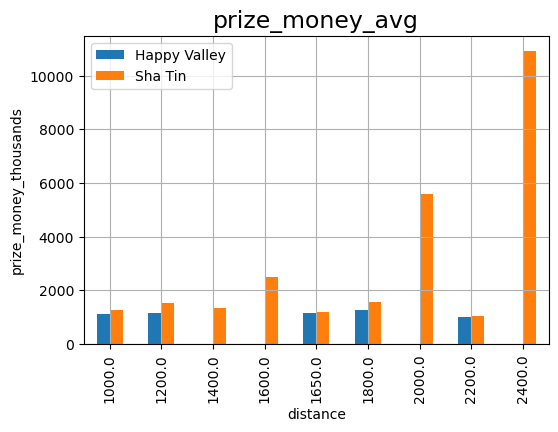

In [59]:
df_g.plot(kind = 'bar', ylabel = 'prize_money_thousands', xlabel = 'distance', title = 'prize_money_avg', figsize=(6, 4))
plt.title('prize_money_avg', fontsize = 17)
plt.legend(loc='upper left')
plt.legend(['Happy Valley', 'Sha Tin'])
plt.grid(True)

(array([1000, 1200, 1400, 1600, 1650, 1800, 2000, 2200, 2400]),
 [Text(1000, 0, '1000'),
  Text(1200, 0, '1200'),
  Text(1400, 0, '1400'),
  Text(1600, 0, '1600'),
  Text(1650, 0, '1650'),
  Text(1800, 0, '1800'),
  Text(2000, 0, '2000'),
  Text(2200, 0, '2200'),
  Text(2400, 0, '2400')])

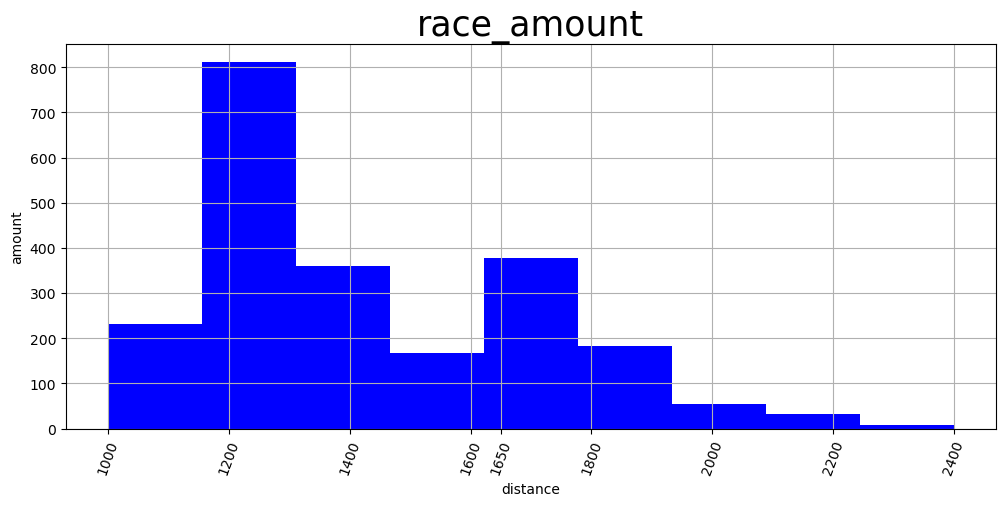

In [60]:
df_prize_money['distance'].hist(bins = 9, grid=True, rwidth= 1, color='blue', figsize=(12, 5)) # bins деление интервалов
plt.title('race_amount', fontsize = 25)
plt.xlabel('distance')
plt.ylabel('amount')
plt.xticks([1000, 1200, 1400, 1600, 1650, 1800, 2000, 2200, 2400])
plt.xticks(rotation=70)

**ВЫВОДЫ: Призовой фонд**

Суммарно призовой фонд за три сезона составил 3417068.0 тыс. гонконгских долл. В среднем призовой фонд забега выше на ипподроме Sha Tin. Самые большие призовые фонды формируются в забегах, проводимых в воскресенье (в среднем 1201 и 2059 тыс. гонконгских долл. на Happy Valley и Sha Tn

.
Самый высокий призовой фонд в забегах на дистанциях 2000 и 2400 метров. Забеги 2400 м проводятся редко. Больше всего проводятся забеги на дистанцию 1200м.


**<span style="color:orangered">Посмотрим описание лошадей (возраст/страна рождения), жокеев (вес)</span>**